## 1. 데이터 불러오기

In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive

# For Google Colab Mounting
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/BOAZ")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

train = pd.read_csv("final.csv")

In [2]:
df = train.drop('Unnamed: 0',axis=1)
df.head()

,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,maxPlace,rideDistance,...,winPlacePerc,totalDistance,cnt_per_matchid,total_heals,items,headshots_over_kills,killPlace_over_maxPlace,walkDistance_over_heals,workDistance_over_kills,kills_over_match_cnt
0,0,100.000,0,0,45,1,1,58.53,97,0.0,...,0.1875,49.75,97,0,2,0.00,0.463918,0.00000,49.75,0.010309
1,0,8.538,0,0,48,0,0,0.00,96,2004.0,...,0.7368,3093.00,96,0,6,0.00,0.500000,0.00000,0.00,0.000000
2,1,324.200,1,5,5,4,1,49.83,97,1228.0,...,0.8750,3354.84,97,6,12,0.25,0.051546,410.00000,512.50,0.041237
3,3,254.300,0,12,13,2,1,36.00,96,2367.0,...,0.8211,4169.29,96,15,18,0.00,0.135417,148.91667,893.50,0.020833
4,0,136.900,0,0,37,1,1,22.83,96,0.0,...,0.3474,270.70,96,0,1,0.00,0.385417,0.00000,270.70,0.010417


In [3]:
df.shape

(702414, 25)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
solo_model = df

In [6]:
solo_model.isnull().sum()

boosts                         0
damageDealt                    0
headshotKills                  0
heals                          0
killPlace                      0
kills                          0
killStreaks                    0
longestKill                    0
maxPlace                       0
rideDistance                   0
roadKills                      0
swimDistance                   0
vehicleDestroys                0
walkDistance                   0
weaponsAcquired                0
winPlacePerc                   0
totalDistance                  0
cnt_per_matchid                0
total_heals                    0
items                          0
headshots_over_kills           0
killPlace_over_maxPlace        0
walkDistance_over_heals    16030
workDistance_over_kills        0
kills_over_match_cnt           0
dtype: int64

----------------------------------

## 2. Scaling

In [7]:
# 데이터 프레임 전체에 scaling 적용
# from sklearn.preprocessing import StandardScaler #이상치가 많을 때 사용 지양
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Normalizer # 정규분포 아니거나 표준 편차 작을 때 good
# from sklearn.preprocessing import RobustScaler #  이상치 영향 적음

In [8]:
df.columns

Index(['boosts', 'damageDealt', 'headshotKills', 'heals', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'rideDistance', 'roadKills',
       'swimDistance', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPlacePerc', 'totalDistance', 'cnt_per_matchid', 'total_heals',
       'items', 'headshots_over_kills', 'killPlace_over_maxPlace',
       'walkDistance_over_heals', 'workDistance_over_kills',
       'kills_over_match_cnt'],
      dtype='object')

In [9]:
#스케일링 : 변수간의 단위 보정

from sklearn.preprocessing import RobustScaler
scaler = ['damageDealt', 'killPlace', 'killStreaks', 'kills', 'longestKill', 'roadKills', 'vehicleDestroys', 'totalDistance', 
          'items', 'headshots_over_kills', 'workDistance_over_kills', 'killPlace_over_maxPlace', 'kills_over_match_cnt']
min = RobustScaler()
min.fit(df[scaler])
df[scaler] = min.transform(df[scaler])
df.head()

,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,maxPlace,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,totalDistance,cnt_per_matchid,total_heals,items,headshots_over_kills,killPlace_over_maxPlace,walkDistance_over_heals,workDistance_over_kills,kills_over_match_cnt
0,0,0.140479,0,0,-0.042553,1.0,1.0,2.698479,97,0.0,0.0,0.00,0.0,49.75,2,0.1875,-0.264285,97,0,-0.333333,0.00,-0.073283,0.00000,0.096539,0.927835
1,0,-0.393762,0,0,0.021277,0.0,0.0,0.000000,96,2004.0,0.0,0.00,0.0,1089.00,6,0.7368,1.215679,96,0,0.333333,0.00,0.000000,0.00000,0.000000,0.000000
2,1,1.450058,1,5,-0.893617,4.0,1.0,2.297372,97,1228.0,0.0,76.84,0.0,2050.00,6,0.8750,1.343014,97,6,1.333333,0.25,-0.910801,410.00000,0.994502,3.711340
3,3,1.041764,0,12,-0.723404,2.0,1.0,1.659751,96,2367.0,0.0,15.29,0.0,1787.00,3,0.8211,1.739090,96,15,2.333333,0.00,-0.740462,148.91667,1.733829,1.875000
4,0,0.356016,0,0,-0.212766,1.0,1.0,1.052559,96,0.0,0.0,0.00,0.0,270.70,1,0.3474,-0.156835,96,0,-0.500000,0.00,-0.232717,0.00000,0.525291,0.937500


## 3. VIF

+ VIF를 하기 전에 파생변수를 사용해서 삭제해도 되는 변수들은 삭제
    - items(heals, boosts, weaponsAcquired)
    - total_heals(heals, boosts) 삭제 (items와 비슷)
    - totalDistance(walkDistance, rideDistance, swimDistance)
    - headshots_over_kills(headshotKills)
    - walkDistacne_over_heals(결측치가 너무 많아서 삭제,, )
    - cnt_per_matchid(비슷한 데이터가 너무 많음)
    - maxPlace

1. 1차 VIF
    + 결과
        - killPlace 삭제

In [10]:
vif_drop = ['winPlacePerc', 'heals', 'boosts', 'weaponsAcquired', 'total_heals', 'cnt_per_matchid',
            'walkDistance', 'rideDistance', 'swimDistance', 'walkDistance_over_heals','headshotKills','maxPlace']
solo_vif = solo_model.drop(vif_drop, axis = 'columns')

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(solo_vif.values, i) for i in range(solo_vif.shape[1])]
vif['features'] = solo_vif.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,70.338231,killPlace_over_maxPlace
1,67.558724,killPlace
2,23.861704,kills
3,10.576078,kills_over_match_cnt
4,9.342882,damageDealt
5,5.865609,killStreaks
6,2.537099,workDistance_over_kills
7,2.422197,items
8,2.344952,longestKill
9,2.133887,totalDistance


2. 2차 VIF
    + 결과
        - kills보다 match 내 player수 대비 kill 수를 나타내는 kills_over_match_cnt가 더 유의미한 변수 같아서 kills를 삭제

In [12]:
vif_drop = ['winPlacePerc', 'heals', 'boosts', 'weaponsAcquired', 'total_heals', 'cnt_per_matchid',
            'walkDistance', 'rideDistance', 'swimDistance', 'walkDistance_over_heals','headshotKills','maxPlace', 
            'killPlace']
solo_vif = solo_model.drop(vif_drop, axis = 'columns')

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(solo_vif.values, i) for i in range(solo_vif.shape[1])]
vif['features'] = solo_vif.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,23.519091,kills
1,10.352965,kills_over_match_cnt
2,9.332068,damageDealt
3,5.860572,killStreaks
4,2.859983,killPlace_over_maxPlace
5,2.537012,workDistance_over_kills
6,2.422077,items
7,2.344951,longestKill
8,2.133841,totalDistance
9,1.486811,headshots_over_kills


3. 3차 VIF
    + 결과
        - 남은 변수('damageDealt', 'killStreaks', 'longestKill', 'roadKills',
       'vehicleDestroys', 'totalDistance', 'items', 'headshots_over_kills',
       'killPlace_over_maxPlace', 'workDistance_over_kills',
       'kills_over_match_cnt')

In [14]:
vif_drop = ['winPlacePerc', 'heals', 'boosts', 'weaponsAcquired', 'total_heals', 'cnt_per_matchid',
            'walkDistance', 'rideDistance', 'swimDistance', 'walkDistance_over_heals','headshotKills','maxPlace', 
            'killPlace', 'kills']
solo_vif = solo_model.drop(vif_drop, axis = 'columns')

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(solo_vif.values, i) for i in range(solo_vif.shape[1])]
vif['features'] = solo_vif.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,6.285791,kills_over_match_cnt
1,5.812363,damageDealt
2,4.399435,killStreaks
3,2.691304,killPlace_over_maxPlace
4,2.453928,workDistance_over_kills
5,2.390480,items
6,2.244249,longestKill
7,2.099468,totalDistance
8,1.486798,headshots_over_kills
9,1.035576,roadKills


In [16]:
solo_vif.columns

Index(['damageDealt', 'killStreaks', 'longestKill', 'roadKills',
       'vehicleDestroys', 'totalDistance', 'items', 'headshots_over_kills',
       'killPlace_over_maxPlace', 'workDistance_over_kills',
       'kills_over_match_cnt'],
      dtype='object')

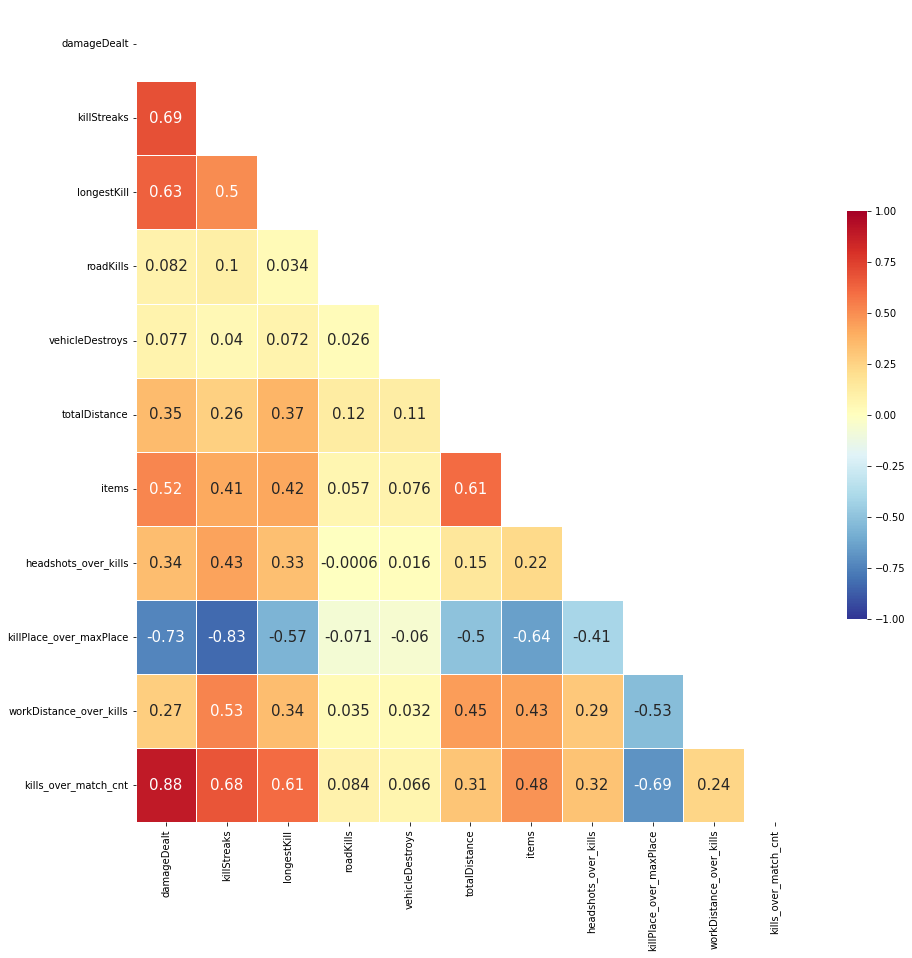

In [17]:
# solo_vif.corr().style.background_gradient().set_properties(**{'font-size': '11pt'})
vif_1 = solo_vif.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(vif_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(vif_1, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,
            annot_kws={"size": 15}# 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 4. OLS(VIF 전 OLS = 0.887, VIF 후 OLS = 0.758)

### VIF 하기 전 OLS 값(0.887) 

In [18]:
f_y = solo_model['winPlacePerc']
f_X = solo_model.drop('walkDistance_over_heals',axis = 'columns')
f_X = f_X.drop('winPlacePerc',axis = 'columns')

In [19]:
import statsmodels.api as sm

model = sm.OLS(f_y, f_X).fit() #회귀분석 계산
display(model.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           winPlacePerc   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 2.614e+05
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:35:10   Log-Likelihood:             6.3108e+05
No. Observations:              702414   AIC:                        -1.262e+06
Df Residuals:                  702392   BIC:                        -1.262e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
boosts                   -314.0344    361.942     -0.868      0.386   -1023.429     395.360
damageDealt                 0.0139      0.000     34.533      0.000       0.013       0.015
headshotKills               0.0489      0.000    115.000      0.000       0.048       0.050
heals                    -314.0511    361.942     -0.868      0.386   -1023.445     395.343
killPlace                  -0.0963      0.004    -26.551      0.000      -0.103      -0.089
kills                      -0.0628      0.000   -161.016      0.000      -0.064      -0.062
killStreaks                -0.2196      0.001   -414.592      0.000      -0.221      -0.219
longestKill                -0.0016   7.55e-05    -21.076      0.000      -0.002      -0.001
maxPlace                    0.0104   8.63e-05    120.608      0.000       0.010       0.011
rideDistance                6.3534      7.322      0.868      0.386      -7.997      20.704
roadKills                   0.0471      0.001     34.950      0.000       0.044       0.050
swimDistance                6.3535      7.322      0.868      0.386      -7.997      20.704
vehicleDestroys            -0.0113      0.002     -6.705      0.000      -0.015      -0.008
walkDistance                6.3535      7.322      0.868      0.386      -7.997      20.704
weaponsAcquired          -942.1249   1085.826     -0.868      0.386   -3070.308    1186.058
totalDistance           -1.306e+04   1.51e+04     -0.868      0.386   -4.26e+04    1.64e+04
cnt_per_matchid            -0.0083   7.43e-05   -111.853      0.000      -0.008      -0.008
total_heals              -628.0855    723.884     -0.868      0.386   -2046.874     790.703
items                    5652.8154   6514.953      0.868      0.386   -7116.280    1.84e+04
headshots_over_kills       -0.0855      0.001   -107.821      0.000      -0.087      -0.084
killPlace_over_maxPlace    -0.3873      0.004   -106.677      0.000      -0.394      -0.380
workDistance_over_kills     0.0095      0.000     66.736      0.000       0.009       0.010
kills_over_match_cnt        0.0171      0.000     72.117      0.000       0.017       0.018
==============================================================================
Omnibus:                   188474.418   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7077961.045
Skew:                           0.598   Prob(JB):                         0.00
Kurtosis:                      18.505   Cond. No.                     1.62e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  8e-21. This might indicate that there are
strong multicollinearity problems or that t

### VIF 한 후 OLS 값(0.758)

In [20]:
X_OLS = solo_vif
y_OLS = solo_model['winPlacePerc']

In [21]:
import statsmodels.api as sm

model_ols = sm.OLS(y_OLS, X_OLS).fit() #회귀분석 계산
display(model_ols.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           winPlacePerc   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                          2.001e+05
Date:                Thu, 02 Mar 2023   Prob (F-statistic):                        0.00
Time:                        11:35:15   Log-Likelihood:                     -1.1231e+05
No. Observations:              702414   AIC:                                  2.246e+05
Df Residuals:                  702403   BIC:                                  2.248e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
damageDealt                -0.1462      0.001   -173.082      0.000      -0.148      -0.145
killStreaks                 0.3927      0.001    409.848      0.000       0.391       0.395
longestKill                 0.0139      0.000     65.281      0.000       0.013       0.014
roadKills                  -0.2351      0.004    -60.869      0.000      -0.243      -0.228
vehicleDestroys            -0.0533      0.005    -11.003      0.000      -0.063      -0.044
totalDistance               0.1686      0.000    358.706      0.000       0.168       0.169
items                       0.1628      0.001    278.326      0.000       0.162       0.164
headshots_over_kills        0.0483      0.001     34.729      0.000       0.046       0.051
killPlace_over_maxPlace     0.2607      0.001    271.888      0.000       0.259       0.263
workDistance_over_kills     0.0284      0.000     82.971      0.000       0.028       0.029
kills_over_match_cnt        0.0806      0.000    175.861      0.000       0.080       0.081
==============================================================================
Omnibus:                   228148.423   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6765363.532
Skew:                          -0.956   Prob(JB):                         0.00
Kurtosis:                      18.083   Cond. No.                         46.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Modeling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = solo_vif
y = solo_model['winPlacePerc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
print(X_train.shape, X_test.shape)

(561931, 11) (140483, 11)


### 1) Linear Regression

In [24]:
model_lr = LinearRegression(normalize=True, n_jobs=8)
model_lr = model_lr.fit(X_train, y_train)

print("Linear Train Score:", model_lr.score(X_train, y_train))
print("Linear Test Score:", model_lr.score(X_test, y_test))

Linear Train Score: 0.8570741121533676
Linear Test Score: 0.8558295249334221


In [25]:
lr_pred = model_lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,lr_pred)
print("Linear Regression 모델의 mae 값 : ", mae)

Linear Regression 모델의 mae 값 :  0.07478580040735773


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)

print("mse:", mse)
print("r2: ", r2)

mse: 0.012350987145930335
r2:  0.8558295249334221


In [28]:
lr_pred

array([0.57402768, 0.82888524, 0.28097829, ..., 0.91431014, 0.88493078,
       0.5530217 ])

In [29]:
result = pd.DataFrame({'pred' : lr_pred, 'real' : y_test})

result.head()

,pred,real
340292,0.574028,0.6082
329156,0.828885,0.6593
554530,0.280978,0.2766
124727,0.708366,0.5417
23590,0.057935,0.0421


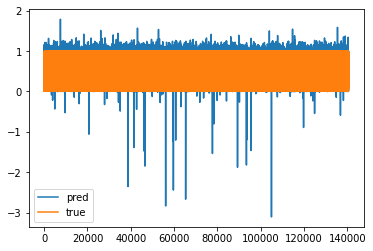

In [30]:
plt.plot(np.array(lr_pred),label = "pred")
plt.plot(np.array(y_test),label = "true")
plt.legend()
plt.show()

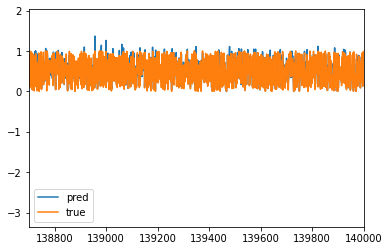

In [31]:
plt.plot(np.array(lr_pred),label = "pred")
plt.plot(np.array(y_test),label = "true")
plt.xlim(138700,140000)
plt.legend()
plt.show()

In [32]:
mc = pd.DataFrame(model_lr.coef_)
mc.columns = ['coef']
sc = pd.DataFrame(solo_vif.columns)
sc.columns = ['feature']
pd.concat([sc, mc], axis = 1)

In [33]:
sc = pd.DataFrame(solo_vif.columns)
sc.columns = ['feature']

In [34]:
pd.concat([sc, mc], axis = 1)

,feature,coef
0,damageDealt,-0.011731
1,killStreaks,-0.326499
2,longestKill,-0.002032
3,roadKills,0.034323
4,vehicleDestroys,-0.036913
5,totalDistance,0.041945
6,items,0.051090
7,headshots_over_kills,-0.019294
8,killPlace_over_maxPlace,-0.550873
9,workDistance_over_kills,0.035585


### 2) Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=10)

forest = model_rf.fit(X_train,y_train)

print("Random Forest Train Score:", forest.score(X_train, y_train))
print("Random Forest Test Score:", forest.score(X_test, y_test))

Random Forest Train Score: 0.9889241418030403
Random Forest Test Score: 0.9382847925739637


In [36]:
model_rf = RandomForestRegressor(n_estimators=6, max_depth = 6)

forest = model_rf.fit(X_train,y_train)

print("Random Forest Train Score:", forest.score(X_train, y_train))
print("Random Forest Test Score:", forest.score(X_test, y_test))

Random Forest Train Score: 0.9150927088994153
Random Forest Test Score: 0.9150742225193895


In [24]:
# 너무 과적합 같아서 tree의 개수 늘림(https://www.kaggle.com/code/carlolepelaars/pubg-data-exploration-rf-funny-gifs#Final-Random-Forest-Model-)
# 근데 비슷,,, train의 score는 줄고 test의 score가 증가하긴 함
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=70, min_samples_leaf=3, max_features=0.5, n_jobs=-1)

forest = model_rf.fit(X_train,y_train)

print("Random Forest Train Score:", forest.score(X_train, y_train))
print("Random Forest Test Score:", forest.score(X_test, y_test))

Random Forest Train Score: 0.9768989530073064
Random Forest Test Score: 0.9455170438095029


In [25]:
pred_rf = forest.predict(X_test)

In [26]:
result = pd.DataFrame({'pred' : pred_rf, 'real' : y_test})

result.head()

,pred,real
612266,0.161171,0.1649
190422,0.823714,0.8469
579886,0.915471,0.9677
570019,0.839072,0.7727
41467,0.539364,0.4494


In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, pred_rf)
print("Random Forest 모델의 mae 값 : ", mae)

Random Forest 모델의 mae 값 :  0.048543936988576154


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred_rf)
r2 = r2_score(y_test, pred_rf)

print("mse:", mse)
print("r2: ", r2)

mse: 0.004671591478348675
r2:  0.9455170438095029


In [29]:
mc = pd.DataFrame(forest.coef_)
mc.columns = ['coef']
sc = pd.DataFrame(solo_vif.columns)
sc.columns = ['feature']
pd.concat([sc, mc], axis = 1)

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [28]:
# 변수 간 중요도
list(forest.feature_importances_)

[0.014693008146879414,
 0.004276235689475142,
 0.01536076324866593,
 6.368026229921779e-05,
 2.543267533956589e-05,
 0.4870666855346937,
 0.11252043264365019,
 0.0008467521962464881,
 0.31918991479363873,
 0.03491899566862512,
 0.011038099140486599]

In [29]:
mc = pd.DataFrame(forest.feature_importances_)
mc.columns = ['feature_importances']
sc = pd.DataFrame(solo_vif.columns)
sc.columns = ['feature']
pd.concat([sc, mc], axis = 1)

,feature,feature_importances
0,damageDealt,0.014693
1,killStreaks,0.004276
2,longestKill,0.015361
3,roadKills,0.000064
4,vehicleDestroys,0.000025
5,totalDistance,0.487067
6,items,0.112520
7,headshots_over_kills,0.000847
8,killPlace_over_maxPlace,0.319190
9,workDistance_over_kills,0.034919


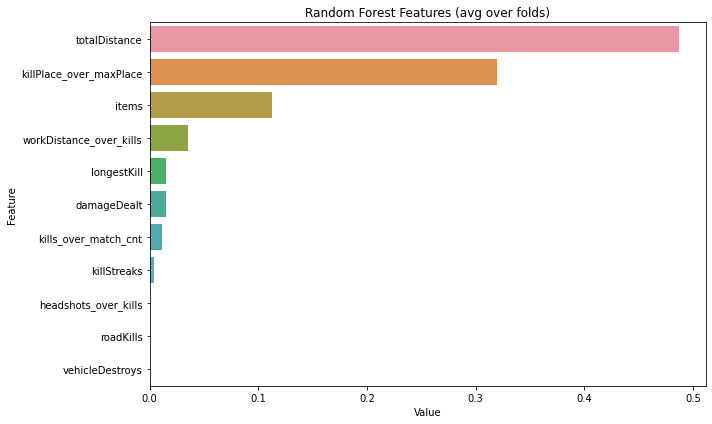

In [30]:
feature_importance = pd.DataFrame(sorted(zip(forest.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('Random Forest Features (avg over folds)')
plt.tight_layout() 

In [ ]:
import shap

tree_explainer = shap.TreeExplainer(forest)
shap_values = tree_explainer.shap_values(X_test)

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.summary_plot(shap_values, X_test)

### 2-1) RF gridsearchCV

In [107]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10, 50, 100],
          'max_depth' : [6, 8, 10, 12],
          'min_samples_leaf' : [8, 12, 18],
          'min_samples_split' : [8, 16, 20]
         }

In [109]:
model = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(model, param_grid=params, cv=3)

In [110]:
grid_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print('Best Hyper-Parameter : {}'.format(grid_cv.best_params_))
print('Best Accuracy : {:.4f}'.format(grid_cv.best_score_))

### 3) lightgbm

### 3-1) lightgbm_1(feature_importances_가 안됨, r2 = 0.93, RMSE: 0.074)

In [50]:
import lightgbm as lgb
train_lgb = lgb.Dataset(X_train, label = y_train) 
test_lgb = lgb.Dataset(X_test, label = y_test) 

params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2020}

model_lgb = lgb.train(params, train_lgb, 1000, test_lgb, verbose_eval=100, early_stopping_rounds=500)
predict_lgb_train = model_lgb.predict(X_train)
predict_lgb_test = model_lgb.predict(X_test)

C:\Users\user\anaconda3\envs\selenium\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\envs\selenium\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1503
[LightGBM] [Info] Number of data points in the train set: 561931, number of used features: 11
[LightGBM] [Info] Start training from score 0.497490
Training until validation scores don't improve for 500 rounds
[100]	valid_0's l2: 0.0169574
[200]	valid_0's l2: 0.00736721
[300]	valid_0's l2: 0.00593167
[400]	valid_0's l2: 0.00567235
[500]	valid_0's l2: 0.00560521
[600]	valid_0's l2: 0.00557989
[700]	valid_0's l2: 0.00556918
[800]	valid_0's l2: 0.00556337
[900]	valid_0's l2: 0.00556013
[1000]	valid_0's l2: 0.00555888
Did not meet early stopping. Best iteration is:
[973]	valid_0's l2: 0.00555863


In [51]:
pd.DataFrame(sorted(zip(model_lgb.feature_importances_, X_train.columns)))

AttributeError: 'Booster' object has no attribute 'feature_importances_'

In [52]:
mae = mean_absolute_error(y_test,predict_lgb_test)
print("lightgbm 모델의 mae 값 : ", mae)

lightgbm 모델의 mae 값 :  0.054471833249289364


In [53]:
from sklearn.metrics import mean_squared_error
import math

print("RMSE: {}".format(math.sqrt(mean_squared_error(predict_lgb_test, y_test)))) # RMSE

RMSE: 0.0745562222544547


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predict_lgb_test)
r2 = r2_score(y_test, predict_lgb_test)

In [55]:
print("mse:", mse)
print("r2: ", r2)

mse: 0.005558630276855647
r2:  0.9349672954470518


In [ ]:
# 이유는 모르겠지만 너무 오래 걸림,,
import shap
explainer = shap.Explainer(model_lgb)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0])

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
## https://www.kaggle.com/code/plasticgrammer/pubg-finish-placement-prediction-playground#Predict

### 3-2) lightgbm gridsearhCV

In [150]:
from sklearn.model_selection import GridSearchCV

In [148]:
def find_best_hyperparameters(model):
    # Grid parameters for using in Gridsearch while tuning
    gridParams = {
        'learning_rate'         : [0.1, 0.01 , 0.05],
        'n_estimators '         : [1000, 10000, 20000],
        'bagging_fraction'      : [0.5, 0.6 ,0.7],
        'feature_fraction'      : [0.5, 0.6 ,0.7],
        'num_leaves'            : [31, 80, 140]
    }
    # Create the grid
    grid = GridSearchCV(model, 
                        gridParams,
                        verbose=5,
                        cv=3)
    # Run the grid
    grid.fit(X_train, y_train)
    print('Best parameters: %s' % grid.best_params_)
    print('Accuracy: %.2f' % grid.best_score_)
    return

------------------------------------------

### 3-3) 다른 lgb모델

In [46]:
from lightgbm import LGBMRegressor

params = {'n_estimators': 1000,
    'learning_rate': 0.1, 
    'num_leaves': 20,
    'objective': 'regression_l2', 
    'metric': 'mae',
    'verbose': -1,}


model_lgb = LGBMRegressor(**params)
model_lgb = model_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mae', verbose=100)

[100]	valid_0's l1: 0.0484606
[200]	valid_0's l1: 0.0479913
[300]	valid_0's l1: 0.0478631
[400]	valid_0's l1: 0.0477947
[500]	valid_0's l1: 0.0477558
[600]	valid_0's l1: 0.0477237
[700]	valid_0's l1: 0.0477042
[800]	valid_0's l1: 0.0476922
[900]	valid_0's l1: 0.0476854
[1000]	valid_0's l1: 0.0476853


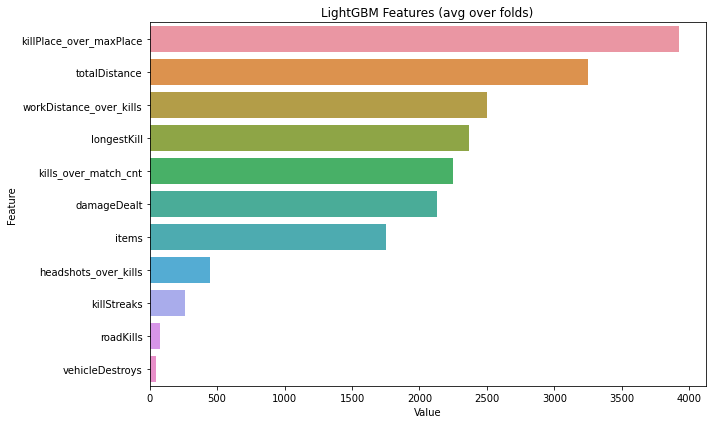

In [47]:
feature_importance = pd.DataFrame(sorted(zip(model_lgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout() 

In [48]:
print("lightgbm Train Score:", model_lgb.score(X_train, y_train))
print("lightgbm Test Score:", model_lgb.score(X_test, y_test))

lightgbm Train Score: 0.9501986390837656
lightgbm Test Score: 0.9471965046567572


In [49]:
y_pred = model_lgb.predict(X_test)

In [50]:
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})

result.head()

,pred,real
340292,0.664885,0.6082
329156,0.794189,0.6593
554530,0.273470,0.2766
124727,0.652187,0.5417
23590,0.044144,0.0421


In [51]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("lightgbm 모델의 mae 값 : ", mae)

lightgbm 모델의 mae 값 :  0.04768534861961859


In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse:", mse)
print("r2: ", r2)

mse: 0.004523639753170058
r2:  0.9471965046567572


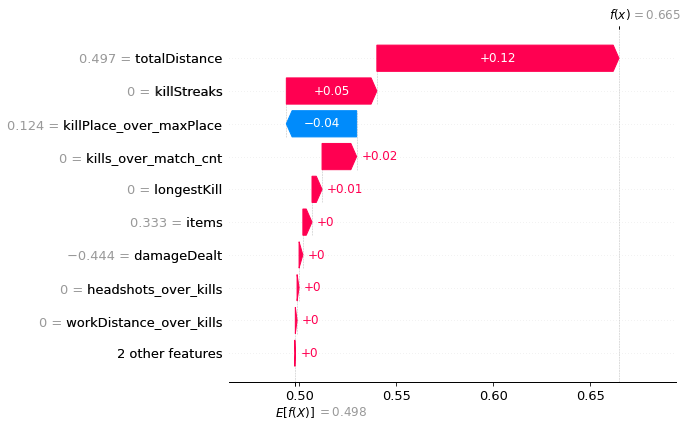

In [53]:
import shap

explainer = shap.Explainer(model_lgb)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0])

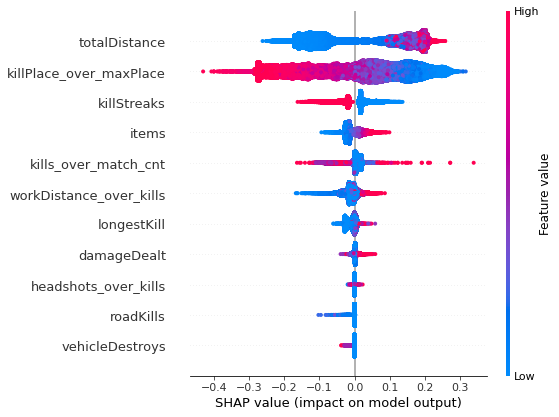

In [54]:
shap.summary_plot(shap_values, X_test)

### 4) XGboost

#### 4-2) walkDistance, rideDistance, swimDistance 삭제

In [55]:
#from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor(max_depth=17, gamma=0.3, learning_rate= 0.1)
xgb = xgb.fit(X_train,y_train)

In [56]:
print("XGboost Train Score:", xgb.score(X_train, y_train))
print("XGboost Test Score:", xgb.score(X_test, y_test))

XGboost Train Score: 0.9487743803591281
XGboost Test Score: 0.9468730041487153


In [57]:
y_pred = xgb.predict(X_test)

In [60]:
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})

result.head()

,pred,real
340292,0.663299,0.6082
329156,0.791687,0.6593
554530,0.277082,0.2766
124727,0.665687,0.5417
23590,0.044870,0.0421


In [61]:
mae = mean_absolute_error(y_test, y_pred)
print("XGboost 모델의 mae 값 : ", mae)

XGboost 모델의 mae 값 :  0.04785453662810039


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse:", mse)
print("r2: ", r2)

mse: 0.004551353823021614
r2:  0.9468730041487153


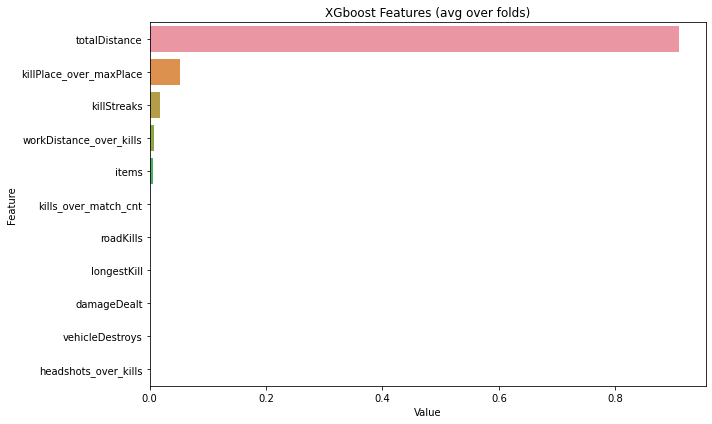

In [63]:
feature_importance = pd.DataFrame(sorted(zip(xgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGboost Features (avg over folds)')
plt.tight_layout() 

In [64]:
from xgboost import plot_importance

xgb.feature_importances_

#xgb.plot_importance(xgb)

array([1.0304280e-03, 1.8200386e-02, 1.1537907e-03, 1.2072398e-03,
       7.9964614e-04, 9.0973198e-01, 5.4714959e-03, 6.3520577e-04,
       5.2221671e-02, 8.0859363e-03, 1.4622792e-03], dtype=float32)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


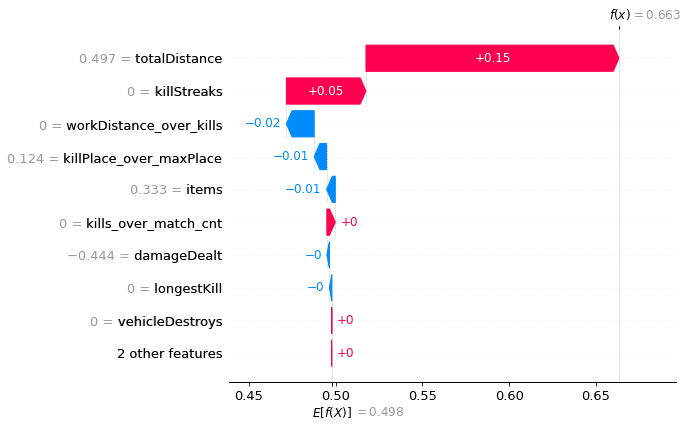

In [65]:
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0])

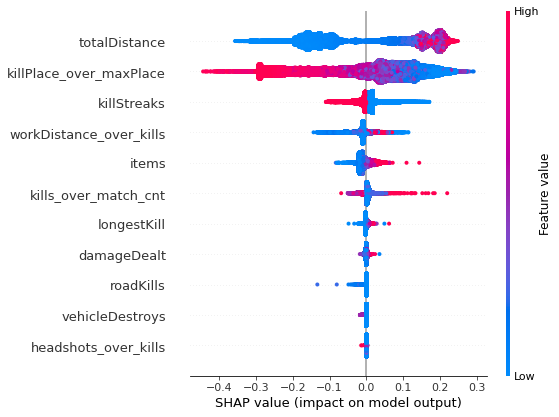

In [66]:
shap.summary_plot(shap_values, X_test)

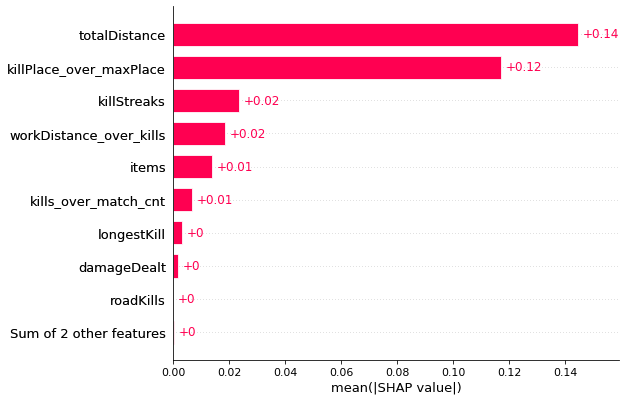

In [67]:
shap.plots.bar(shap_values)